In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import time

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]
last_date


'2017-08-23'

In [11]:
count_anuall_data = session.query(func.count(Measurement.date)).first()[0]
count_anuall_data

19550

In [12]:
last_date= dt.datetime.strptime(last_date,"%Y-%m-%d")
last_date

datetime.datetime(2017, 8, 23, 0, 0)

In [13]:
# Calculate the date 1 year ago from the last data point in the database
year_ago = last_date - dt.timedelta(days=365)
year_ago

datetime.datetime(2016, 8, 23, 0, 0)

In [14]:
# Perform a query to retrieve the data and precipitation scores
query_1 = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= year_ago).all()
query_1

[('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06', 0.0),
 ('2016-10-07'

In [15]:
# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(query_1)
prcp_df.head()

,date,prcp
0,2016-08-24,0.08
1,2016-08-25,0.08
2,2016-08-26,0.00
3,2016-08-27,0.00
4,2016-08-28,0.01


In [16]:
# Sort the dataframe by date
prcp_df['date'] = pd.to_datetime(prcp_df['date'],format='%Y-%m-%d')
prcp_df['date'].head()

0   2016-08-24
1   2016-08-25
2   2016-08-26
3   2016-08-27
4   2016-08-28
Name: date, dtype: datetime64[ns]

In [17]:
prcp_df.set_index(prcp_df['date'],drop=False)
prcp_df.head()



,date,prcp
0,2016-08-24,0.08
1,2016-08-25,0.08
2,2016-08-26,0.00
3,2016-08-27,0.00
4,2016-08-28,0.01


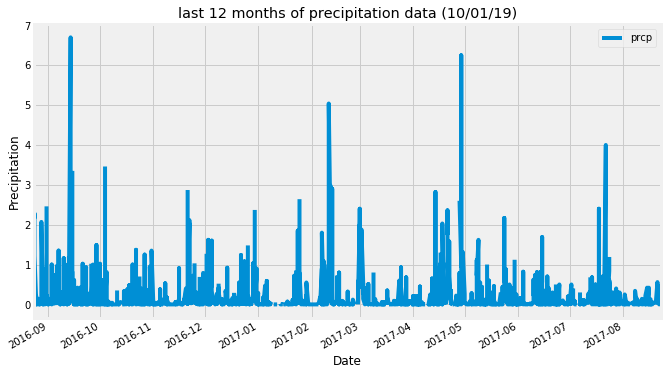

<Figure size 432x288 with 0 Axes>

In [18]:
# Use Pandas Plotting with Matplotlib to plot the data

prcp_df.plot('date','prcp',figsize = (10,6))
plt.xlabel("Date")
plt.ylabel("Precipitation")
plt.title("last 12 months of precipitation data (%s)"% time.strftime("%x"))
plt.show()


plt.savefig("Images/Precipitation1.png")

# Exploratory Climate Analysis

In [19]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


![precipitation](Images/precipitation.png)

In [20]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

In [21]:
# Design a query to show how many stations are available in this dataset?
count_stations = session.query(func.count(Station.id)).first()[0]
count_stations
print(f'Available Stations: {count_stations}')


Available Stations: 9


In [22]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

active_stations = session.query(Measurement.station ,func.count(Measurement.station)).\
group_by(Measurement.station).\
order_by(func.count(Measurement.station).desc()).all()
active_stations

print(f'Active Stations : {active_stations}')





Active Stations : [('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [23]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

lowest_temp = session.query(Measurement.tobs).order_by(Measurement.tobs.asc()).first()[0]
lowest_temp
print(f'Lowest Temperature = {lowest_temp}')

highest_temp = session.query(Measurement.tobs).order_by(Measurement.tobs.desc()).first()[0]
highest_temp
print(f'Highest Temperature = {highest_temp}')

avg_temp = session.query(func.avg(Measurement.tobs).label('average')).filter(Measurement.station == active_stations[0][0]).first()[0]
avg_temp
print(f'Average Temperature = {avg_temp}')

print("-"*20)


#### solution number 2 ####
temp_session = active_stations[0][0]

temperature = session.query(func.min(Measurement.tobs),
                           func.max(Measurement.tobs),
                           func.avg(Measurement.tobs)).filter(Measurement.station == temp_session).all()
temperature
print(f'Low Temperature = {temperature[0][0]}')
print(f'High Temperature = {temperature[0][1]}')
print(f'Average Temperature = {temperature[0][2]}')


Lowest Temperature = 53.0
Highest Temperature = 87.0
Average Temperature = 71.66378066378067
--------------------
Low Temperature = 54.0
High Temperature = 85.0
Average Temperature = 71.66378066378067


In [24]:
# Choose the station with the highest number of temperature observations.
highest_temperatures = session.query(Measurement.station, func.count(Measurement.tobs)).\
group_by(Measurement.station).\
order_by(Measurement.station.desc()).all()

highest_temperatures



[('USC00519523', 2669),
 ('USC00519397', 2724),
 ('USC00519281', 2772),
 ('USC00518838', 511),
 ('USC00517948', 1372),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00513117', 2709),
 ('USC00511918', 1979)]

In [25]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


temp = session.query(Measurement.tobs, Measurement.date).filter(Measurement.date >= year_ago).all()
temp



[(79.0, '2016-08-24'),
 (80.0, '2016-08-25'),
 (79.0, '2016-08-26'),
 (77.0, '2016-08-27'),
 (78.0, '2016-08-28'),
 (78.0, '2016-08-29'),
 (79.0, '2016-08-30'),
 (80.0, '2016-08-31'),
 (81.0, '2016-09-01'),
 (80.0, '2016-09-02'),
 (79.0, '2016-09-03'),
 (75.0, '2016-09-04'),
 (79.0, '2016-09-05'),
 (76.0, '2016-09-06'),
 (76.0, '2016-09-07'),
 (80.0, '2016-09-08'),
 (79.0, '2016-09-09'),
 (78.0, '2016-09-10'),
 (76.0, '2016-09-11'),
 (78.0, '2016-09-12'),
 (78.0, '2016-09-13'),
 (75.0, '2016-09-14'),
 (79.0, '2016-09-15'),
 (80.0, '2016-09-16'),
 (79.0, '2016-09-17'),
 (81.0, '2016-09-18'),
 (77.0, '2016-09-19'),
 (77.0, '2016-09-20'),
 (78.0, '2016-09-21'),
 (76.0, '2016-09-22'),
 (82.0, '2016-09-23'),
 (81.0, '2016-09-24'),
 (78.0, '2016-09-25'),
 (80.0, '2016-09-26'),
 (80.0, '2016-09-27'),
 (79.0, '2016-09-28'),
 (80.0, '2016-09-29'),
 (80.0, '2016-09-30'),
 (80.0, '2016-10-01'),
 (79.0, '2016-10-02'),
 (79.0, '2016-10-03'),
 (79.0, '2016-10-04'),
 (80.0, '2016-10-05'),
 (80.0, '20

In [26]:
temp_df = pd.DataFrame(temp)
temp_df.head()

,tobs,date
0,79.0,2016-08-24
1,80.0,2016-08-25
2,79.0,2016-08-26
3,77.0,2016-08-27
4,78.0,2016-08-28


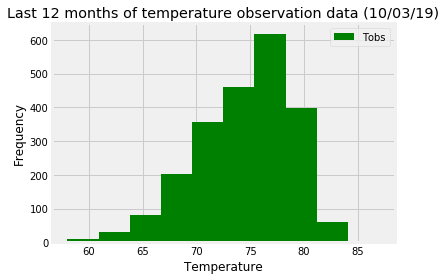

<Figure size 432x288 with 0 Axes>

In [91]:
plt.hist(temp_df['tobs'],bins = 10, color = 'green')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title("Last 12 months of temperature observation data (%s)"% time.strftime("%x"))
plt.legend(['Tobs'])

plt.tight_layout()
plt.show()
plt.savefig("Images/Temperature1.png")


![precipitation](Images/station-histogram.png)

In [29]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [30]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

In [31]:
my_trip = calc_temps('2017-03-03', '2017-03-18')
print(f'tmin, tavg, tmax = {my_trip}')

tmin, tmax, tavg = [(62.0, 71.05102040816327, 82.0)]


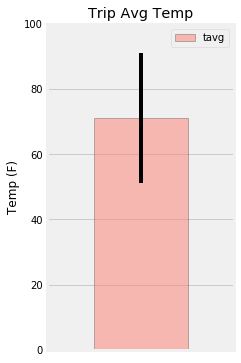

In [52]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

my_trip_df = pd.DataFrame(my_trip, columns = ['tmin', 'tavg', 'tmax'])
my_trip_df

my_trip_df.plot.bar(y = 'tavg',yerr= (my_trip_df['tmax'] - my_trip_df['tmin']), color = 'salmon',edgecolor = 'black',alpha = 0.5, 
                    figsize = (3,6))
plt.xticks([])
plt.yticks(np.arange(0,120,20))
plt.ylabel('Temp (F)')
plt.title('Trip Avg Temp')
plt.savefig("Images/TripAvgTemp1.png")




In [74]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
# rainfall_per_weather= session.query(Station.station ,Station.name, Station.latitude, Station.longitude, Station.elevation, func.sum(Measurement.prcp).filter(Measurement.station == Station.station).filter(Measurement.date >= '2017,03,03', Measurement.date<='2017,03,18').group_by(Measurement.station).order_by(Measurement.station.desc().all()
# rainfall_per_weather

rainfall_station = session.query(Station.station,
                                Station.name,
                                Station.latitude,
                                Station.longitude,
                                Station.elevation, func.sum(Measurement.prcp)
                                ).filter(Measurement.station == Station.station,
                                        Measurement.date.between('2017-03-03','2017-03-18')
                                ).group_by(Station.station
                                ).order_by(func.sum(Measurement.prcp).desc()
                                ).all()
rainfall_station
                                     
          
                  


[('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 2.3),
 ('USC00519281',
  'WAIHEE 837.5, HI US',
  21.45167,
  -157.84888999999998,
  32.9,
  1.58),
 ('USC00516128',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4,
  0.92),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.82),
 ('USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  21.5213,
  -157.8374,
  7.0,
  0.69),
 ('USC00519523',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  21.33556,
  -157.71139,
  19.5,
  0.6),
 ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 0.2)]

In [89]:
rainfall_station_df = pd.DataFrame(np.array(rainfall_station))
rainfall_station_df

rainfall_station_df = rainfall_station_df.rename(columns ={0:"Station",
                                                          1:"Location Name",
                                                          2:"Lat",
                                                          3:"Lng",
                                                          4:"Elevation",
                                                          5:"Total Precipitation"})
rainfall_station_df

,Station,Location Name,Lat,Lng,Elevation,Total Precipitation
0,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6,2.3
1,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84888999999998,32.9,1.58
2,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.3331,-157.8025,152.4,0.92
3,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,0.82
4,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.5213,-157.8374,7.0,0.69
5,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5,0.6
6,USC00517948,"PEARL CITY, HI US",21.3934,-157.9751,11.9,0.2


## Optional Challenge Assignment

In [20]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [21]:
# calculate the daily normals for your trip

# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


[(62.0, 69.15384615384616, 77.0),
 (60.0, 69.39622641509433, 77.0),
 (62.0, 68.9090909090909, 77.0),
 (58.0, 70.0, 76.0),
 (56.0, 67.96428571428571, 76.0),
 (61.0, 68.96491228070175, 76.0),
 (57.0, 68.54385964912281, 76.0)]

In [22]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


,tmin,tavg,tmax
date,,,
2018-01-01,62.0,69.153846,77.0
2018-01-02,60.0,69.396226,77.0
2018-01-03,62.0,68.909091,77.0
2018-01-04,58.0,70.000000,76.0
2018-01-05,56.0,67.964286,76.0


<IPython.core.display.Javascript object>


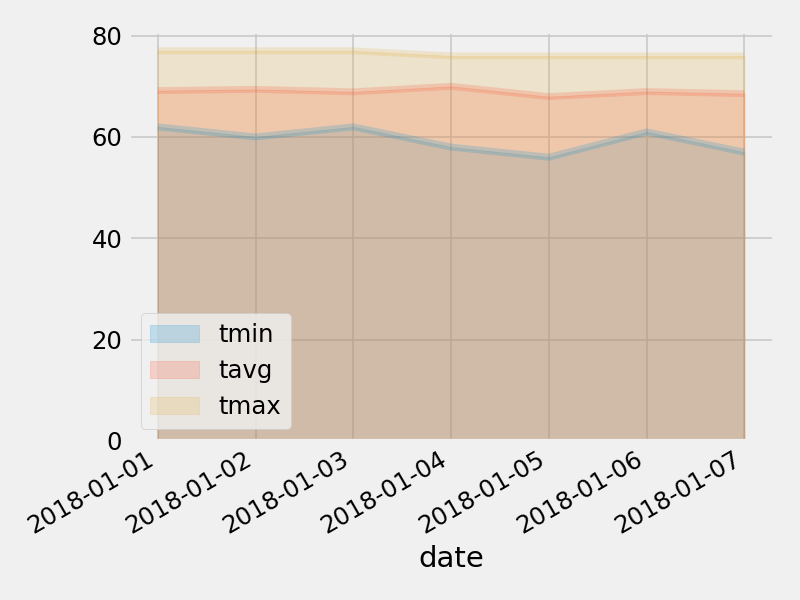

In [23]:
# Plot the daily normals as an area plot with `stacked=False`
